<a href="https://colab.research.google.com/github/araldi/FS22---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L/blob/main/Week4/Python_data_visualization_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Anatomy of a figure



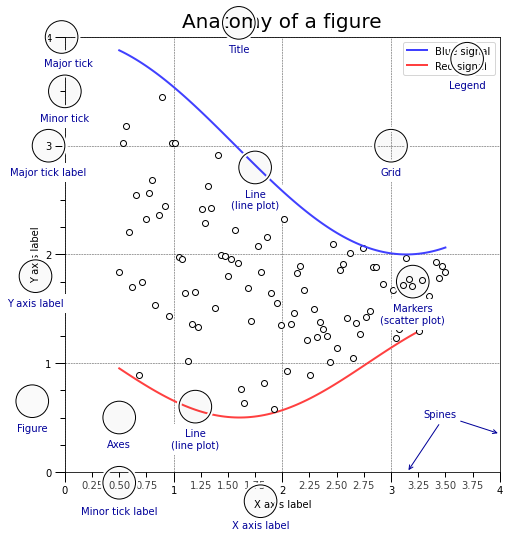

In [33]:
# Figure adapted from here:
# https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/anatomy.py


#more here:
# https://github.com/rougier/scientific-visualization-book


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(123)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x


ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which="major", width=1.0)
ax.tick_params(which="major", length=10)
ax.tick_params(which="minor", width=1.0, labelsize=10)
ax.tick_params(which="minor", length=5, labelsize=10, labelcolor="0.25")

ax.grid(linestyle="--", linewidth=0.5, color=".25", zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker="o", markerfacecolor="w", markeredgecolor="k")

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment="bottom")
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke

    circle = Circle(
        (x, y),
        radius,
        clip_on=False,
        zorder=10,
        linewidth=1,
        edgecolor="black",
        facecolor=(0, 0, 0, 0.0125),
        path_effects=[withStroke(linewidth=5, foreground="w")],
    )
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(
        x,
        y,
        text,
        backgroundcolor="white",
        # fontname="Yanone Kaffeesatz", fontsize="large",
        ha="center",
        va="top",
        weight="regular",
        color="#000099",
    )


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = "#000099"
ax.annotate(
    "Spines",
    xy=(4.0, 0.35),
    xytext=(3.3, 0.5),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

ax.annotate(
    "",
    xy=(3.15, 0.0),
    xytext=(3.45, 0.45),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

# plt.savefig("../../figures/anatomy/anatomy.pdf")
plt.show()

# Types of graphs


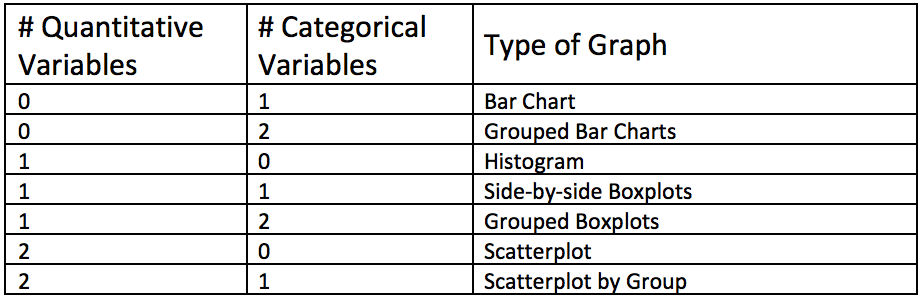

## With categorical data

*   Bar chart (great for counts)
*   Boxplot


## With quantitative data

* Line plot  
* Histogram
*   Scatterplot (with regression line)


Load the data and prepare the datasets

In [2]:
df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/numpy/Week2_homework_data.csv?raw=true')

In [3]:
df.head()

,Unnamed: 0,31-0.0,48-0.0,49-0.0,50-0.0,21002-0.0
0,0,0.0,80.0,103.0,169.0,68.6
1,1,0.0,80.0,96.0,185.0,70.2
2,2,1.0,89.0,97.0,164.0,71.5
3,3,0.0,101.0,108.0,159.0,82.9
4,4,1.0,97.0,107.0,186.0,94.0


In [5]:
dictionary = pd.read_csv('https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/numpy/Week2_homework_dictionary.csv')
dictionary.head()

,Unnamed: 0,Description,Code
0,0,Gender,31-0.0
1,1,Height [cm],50-0.0
2,2,Weight [Kg],21002-0.0
3,3,Waist circumference [cm],48-0.0
4,4,Hip circumference [cm],49-0.0


In [6]:
# rename the dataframe columns

# dictionary comprehenesion converts a tuple in a dictionary
# dict((key, func(key)) for key in keys)
dictionary_columns = dict( (dictionary.loc[i, 'Code'], dictionary.loc[i, 'Description']) for i in dictionary.index)

# or using zip (makes tuples out of equally sized series/arrays)
dictionary_columns = dict(zip(dictionary['Code'], dictionary['Description']))

df = df.rename(columns = dictionary_columns)

df.head()

,Unnamed: 0,Gender,Waist circumference [cm],Hip circumference [cm],Height [cm],Weight [Kg]
0,0,0.0,80.0,103.0,169.0,68.6
1,1,0.0,80.0,96.0,185.0,70.2
2,2,1.0,89.0,97.0,164.0,71.5
3,3,0.0,101.0,108.0,159.0,82.9
4,4,1.0,97.0,107.0,186.0,94.0


In [7]:
!wget https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
sales_data = pd.read_csv('company_sales_data.csv')

--2022-03-16 13:17:01--  https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
Resolving pynative.com (pynative.com)... 172.66.40.219, 172.66.43.37, 2606:4700:3108::ac42:28db, ...
Connecting to pynative.com (pynative.com)|172.66.40.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 659 [text/csv]
Saving to: ‘company_sales_data.csv’

company_sales_data. 100%[===================>]     659  --.-KB/s    in 0s      

2022-03-16 13:17:02 (12.7 MB/s) - ‘company_sales_data.csv’ saved [659/659]



In [8]:
sales_data

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


In [9]:
SNPs = pd.read_csv("https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/pandas/CD93_exomeSNPs_annotation.csv")
SNPs.head()

,Unnamed: 0,Variant name,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,0,rs7492,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,1,rs2567612,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,2,rs2749811,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,3,rs2749812,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,4,rs2749813,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347


In [10]:
# import useful datasets
chipotle = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [11]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Categorical plots

## Barplot

<BarContainer object of 14 artists>

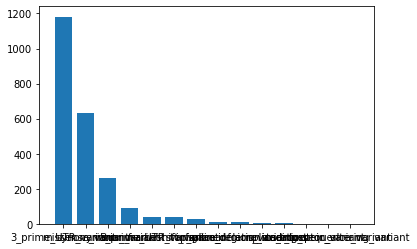

In [12]:
# How many of each type of Variant consequence?
counts = SNPs['Variant consequence'].value_counts()
plt.bar(counts.index, counts.values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

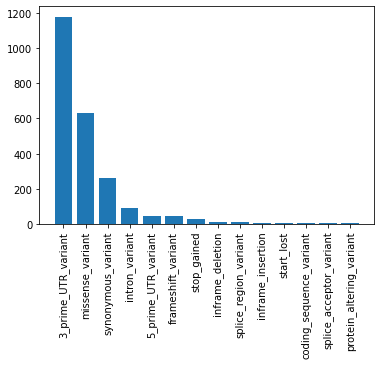

In [ ]:
counts = SNPs['Variant consequence'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)

Text(0, 0.5, 'SNP counts')

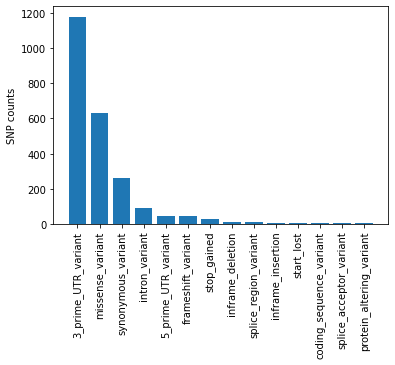

In [ ]:
counts = SNPs['Variant consequence'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.ylabel('SNP counts')

<BarContainer object of 14 artists>

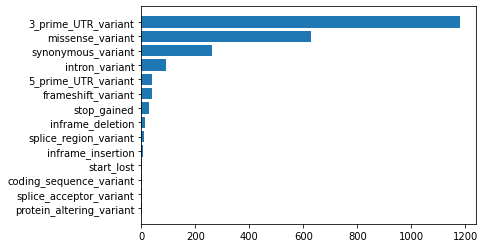

In [ ]:
# How many of each type of Variant consequence?
counts = SNPs['Variant consequence'].value_counts(ascending=True)
plt.barh(counts.index, counts.values)


In [ ]:
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Text(0.5, 0, 'Quantity')

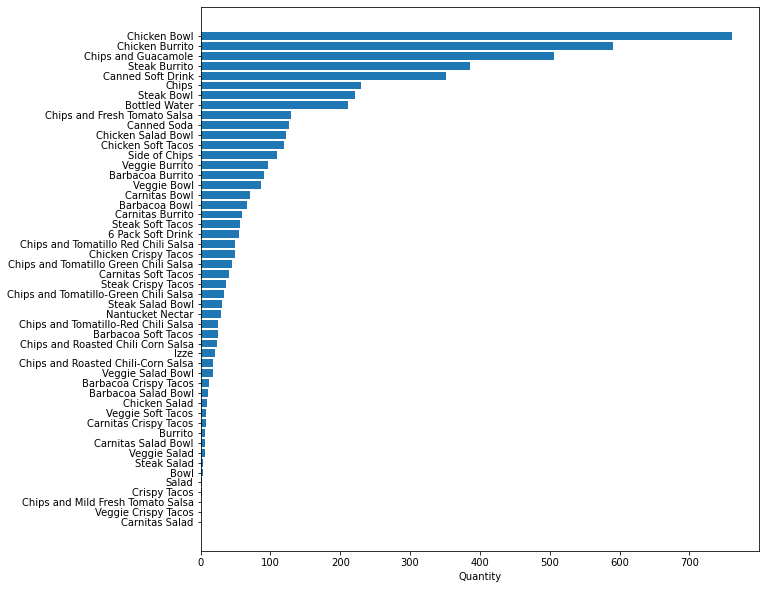

In [ ]:
#plot the cumulative quantity per item in chipotle
item_quantity= chipotle.groupby('item_name')['quantity'].sum()
item_quantity = item_quantity.sort_values()
plt.figure(figsize = (10, 10))
plt.barh(item_quantity.index, item_quantity.values)
plt.xlabel('Quantity')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Quantity')

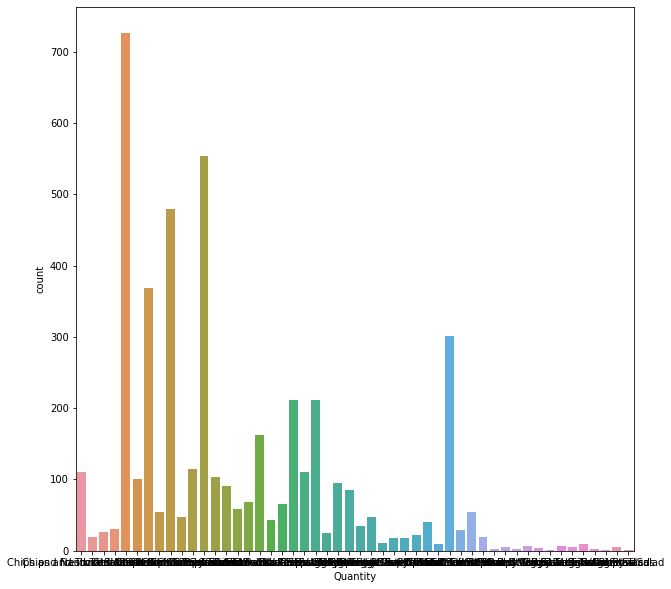

In [13]:
# Alternatively, you can use countplot in Seaborn

plt.figure(figsize = (10, 10))
sns.countplot(chipotle['item_name'])
plt.xlabel('Quantity')

# Do you notice anything?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

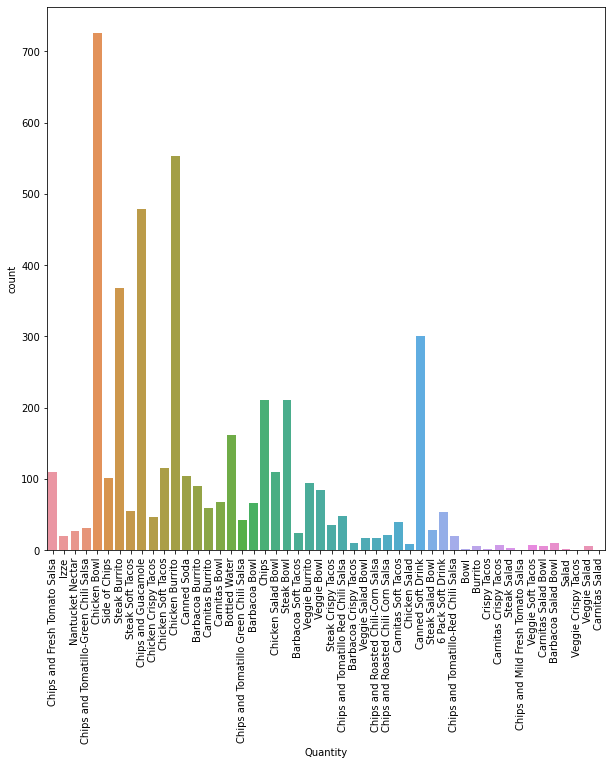

In [14]:

plt.figure(figsize = (10, 10))
sns.countplot(chipotle['item_name'])
plt.xlabel('Quantity')
plt.xticks(rotation=90)

### Exercise 1

Plot the total revenue of the chipotle items (like above, but considering item_price (remember that the dollars have to be converted into numbers!).

### Exercise 2

Plot how many males and females are in the df dataset.

In [ ]:
df

,Unnamed: 0,Gender,Waist circumference [cm],Hip circumference [cm],Height [cm],Weight [Kg]
0,0,0.0,80.0,103.0,169.0,68.6
1,1,0.0,80.0,96.0,185.0,70.2
2,2,1.0,89.0,97.0,164.0,71.5
3,3,0.0,101.0,108.0,159.0,82.9
4,4,1.0,97.0,107.0,186.0,94.0
...,...,...,...,...,...,...
499209,502456,0.0,103.0,118.0,168.0,88.6
499210,502457,1.0,85.0,104.0,177.0,80.5
499211,502458,0.0,72.0,93.0,158.0,59.3
499212,502459,0.0,83.0,107.0,167.0,77.2


## Boxplot

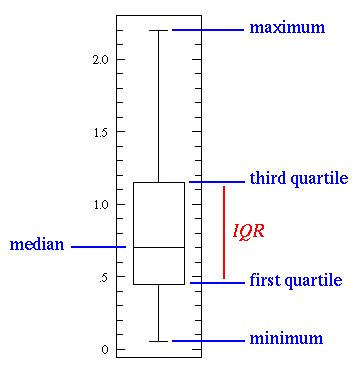

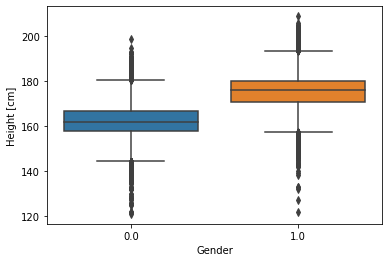

In [ ]:

sns.boxplot(x = "Gender", y = 'Height [cm]', data = df)

Text(0, 0.5, 'Stuff')

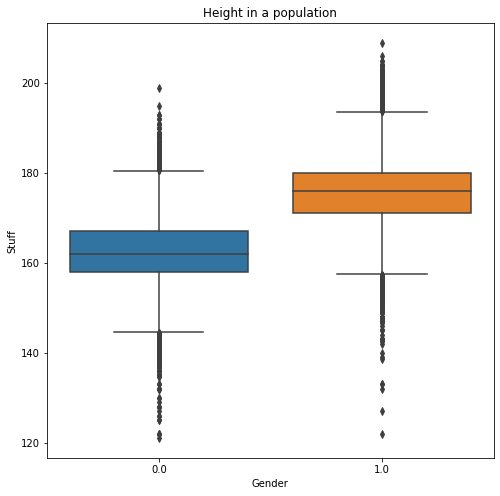

In [ ]:
plt.figure(figsize = (8,8)) # change plot size
sns.boxplot(x = "Gender", y = 'Height [cm]', data = df)

plt.title('Height in a population')
plt.ylabel('Stuff')

Text(0.5, 1.0, 'Height in a population')

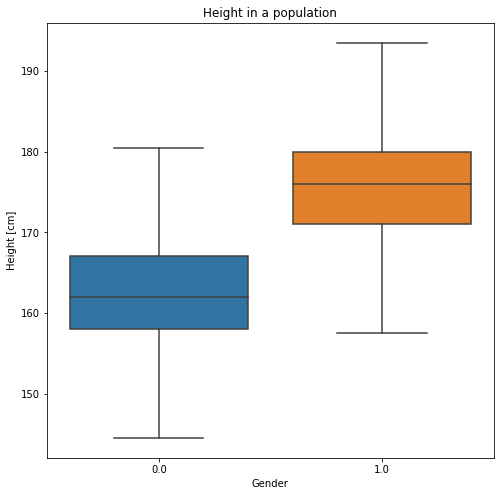

In [ ]:


plt.figure(figsize = (8,8))
sns.boxplot(x = "Gender", y = 'Height [cm]', data = df, showfliers=False) #remove outliers

plt.title('Height in a population')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Height in a population')

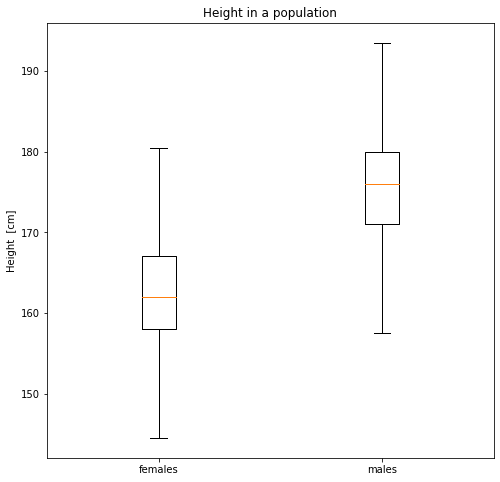

In [ ]:
plt.figure(figsize = (8,8))

data = [df[df['Gender'] == 0]['Height [cm]'], df[df['Gender'] == 1]['Height [cm]']] #give a series of data to plot
plt.boxplot(data, showfliers=False, labels = ['females', 'males']) #and assign labels
plt.ylabel('Height  [cm]')
plt.title('Height in a population')

### Exercise 3

Plot the average waist circumference and hip circumference measurement of males and females (two plots). 

### Exercise 4

Plot two boxplots describing PolyPhen and SIFT scores of Variant consequences of the SNPs dataset.

# Quantitative plots

## Line plot

In [ ]:
sales_data

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


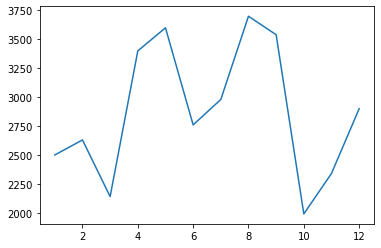

In [ ]:
plt.plot(sales_data['month_number'], sales_data['facecream'])

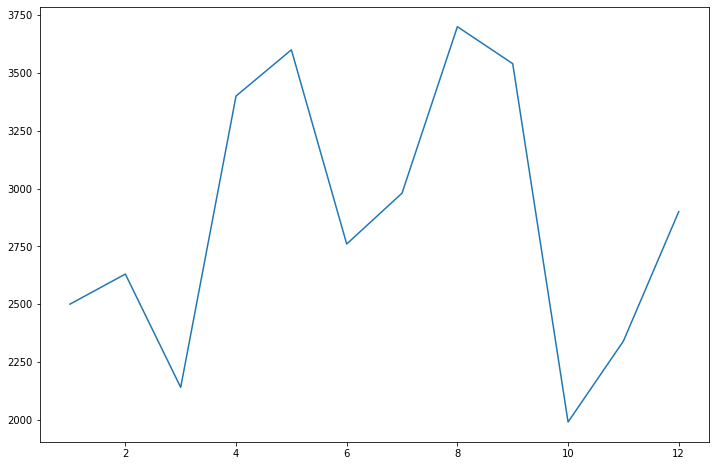

In [ ]:
plt.figure(figsize=(12,8)) #change size of graph
plt.plot(sales_data['month_number'], sales_data['facecream'])

Text(0.5, 0, 'month')

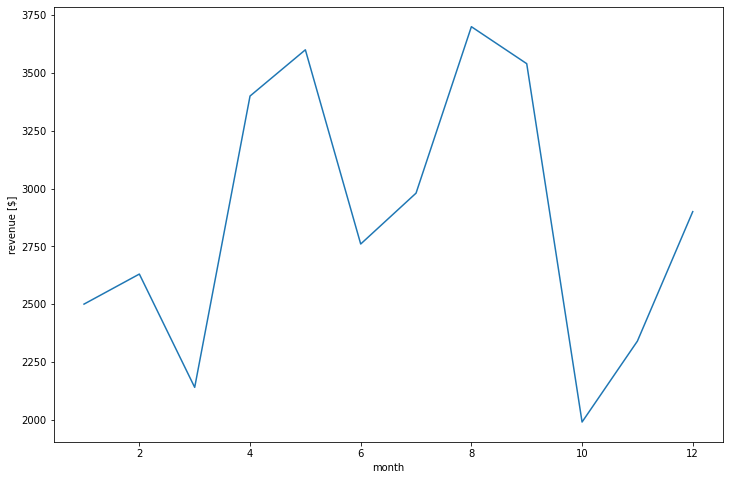

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'])
plt.ylabel("revenue [$]") # add label
plt.xlabel("month") # add label


(0.0, 3785.5)

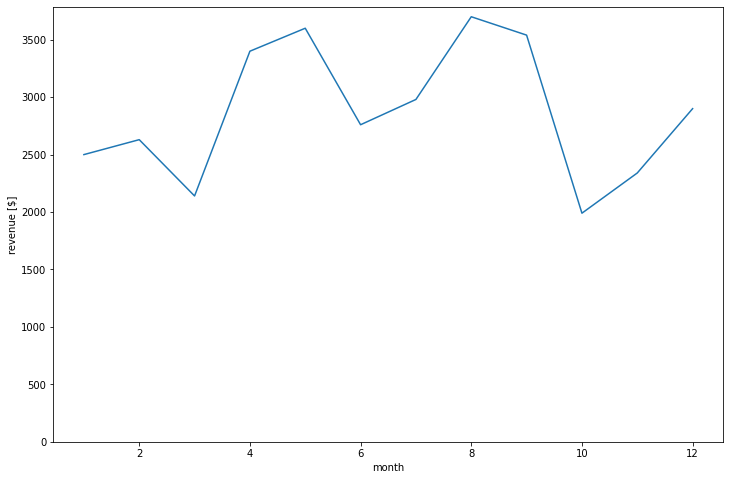

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'])
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.ylim(0,) # restrict the limit

### Exercise 5

Plot the moisturizer sales, showing only data from May until September.

HINT: use xlim()

(5.0, 10.0)

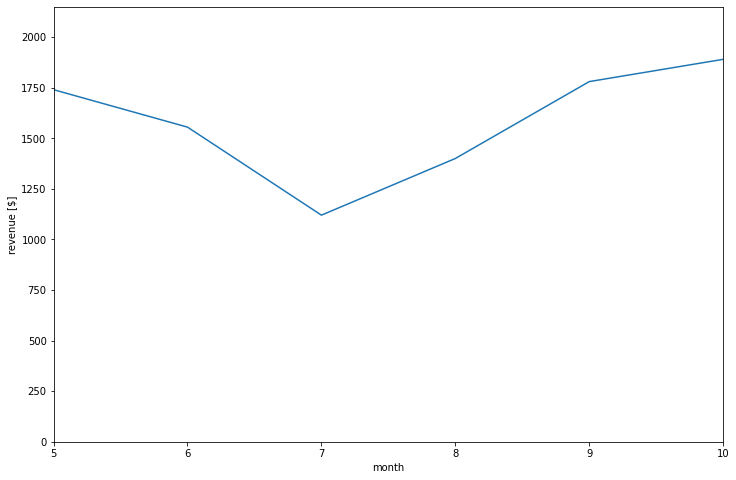

## Histograms

(array([1.00000e+00, 4.00000e+01, 5.27870e+04, 2.07307e+05, 1.94357e+05,
        4.01680e+04, 4.11500e+03, 4.14000e+02, 2.30000e+01, 2.00000e+00]),
 array([ 20. ,  37.7,  55.4,  73.1,  90.8, 108.5, 126.2, 143.9, 161.6,
        179.3, 197. ]),
 <a list of 10 Patch objects>)

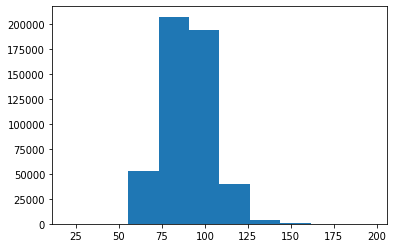

In [ ]:
plt.hist(x = df['Waist circumference [cm]'])


Text(0, 0.5, 'months')

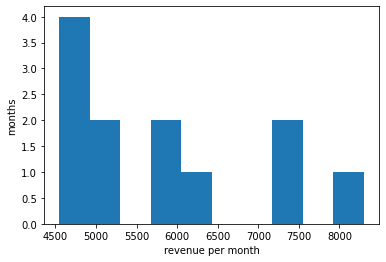

In [ ]:
plt.hist(x = sales_data['toothpaste'])
plt.xlabel('revenue per month')
plt.ylabel('months')

Text(0.5, 1.0, 'Waist circumference in a population')

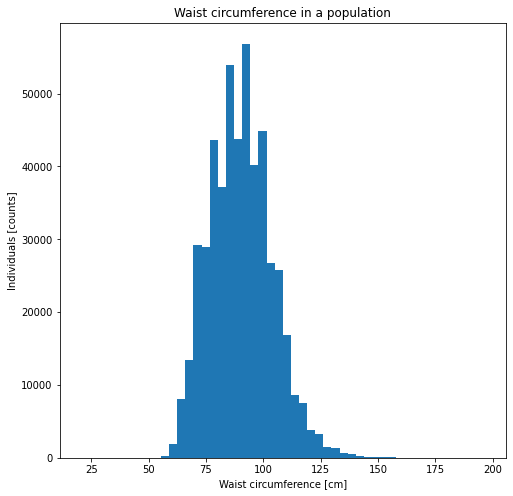

In [ ]:
# a bit better looking
plt.figure(figsize = (8,8))
plt.hist(x = df['Waist circumference [cm]'], bins=50) # change the number of bins

plt.xlabel('Waist circumference [cm]')
plt.ylabel('Individuals [counts]')
plt.title('Waist circumference in a population')

### Exercise 7

Plot the distribution of tips between male and female servers

### Exercise 8


Plot the distribution of tips in the tips dataset for each day of the week.

## Scatterplot

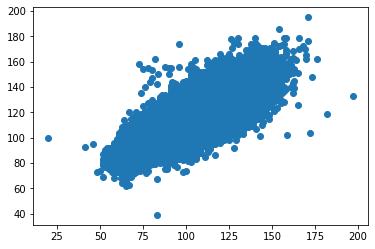

In [ ]:
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'])

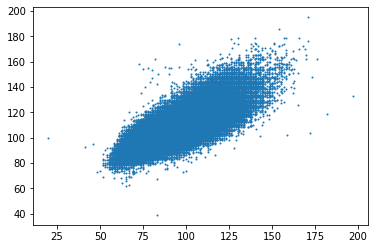

In [ ]:
# change the size of the markers
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1) # s changes the size


Text(0, 0.5, 'Hip circumference [cm]')

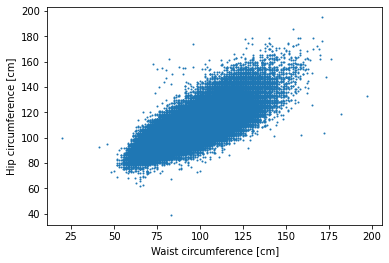

In [ ]:
# add x and y labels
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]')
plt.ylabel('Hip circumference [cm]')

Text(0.5, 1.0, 'Waist and hip circumference in a population')

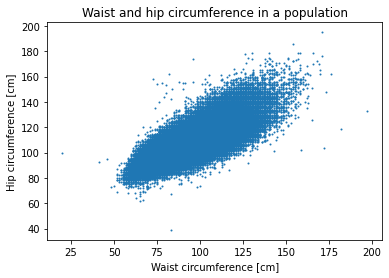

In [ ]:
# add plot title
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]')
plt.ylabel('Hip circumference [cm]')
plt.title('Waist and hip circumference in a population')

Text(0.5, 1.0, 'Waist and hip circumference in a population')

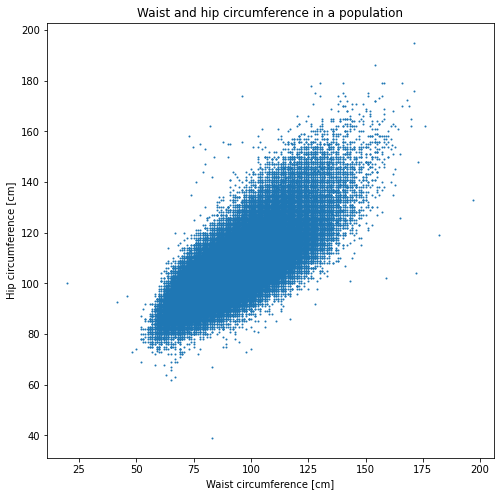

In [ ]:
# change the size of the plot
plt.figure(figsize = (8,8))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]')
plt.ylabel('Hip circumference [cm]')
plt.title('Waist and hip circumference in a population')

### Exercise 9

Plot total bill vs tip amount in every day of the week (tips dataset).


## Lm plot

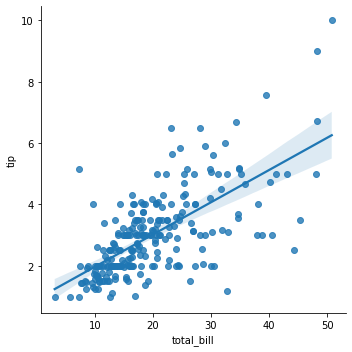

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips)

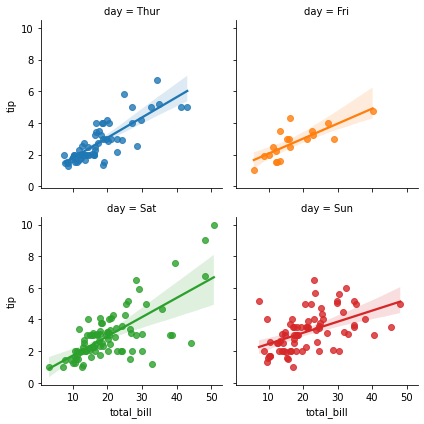

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
               data=tips, col_wrap=2, height=3)

In [ ]:
sns.lmplot?

# Change the estethics of the plot

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text major ticklabel objects>)

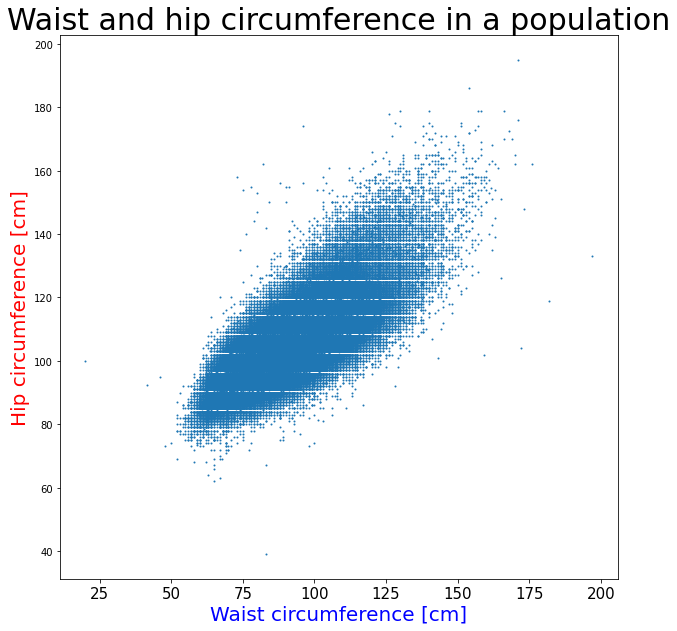

In [18]:
# change font/color of labels/titles
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]',  fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]',  fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population',fontsize = 30)
plt.xticks(fontsize = 15)

### Change properties of graph


(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

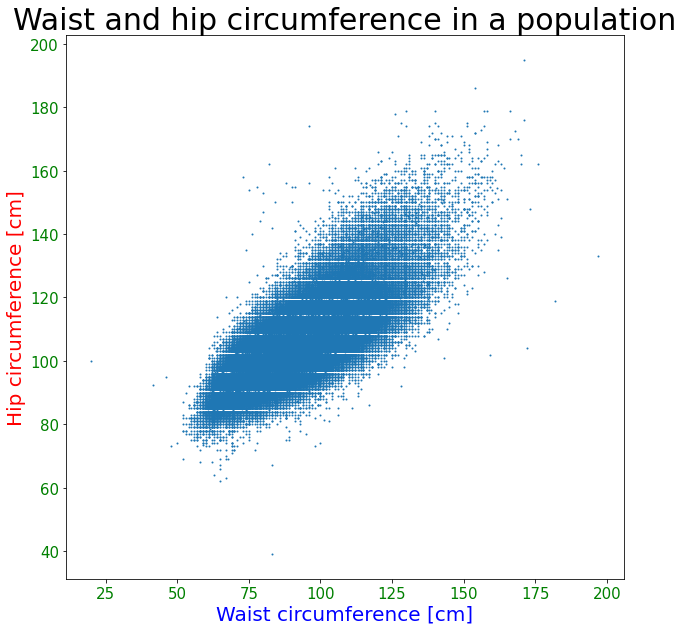

In [20]:
# change the properties of x and y ticks
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]', fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]',  fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population',  fontsize = 30)
plt.xticks( c='g', fontsize = 15 )  # x ticks properties
plt.yticks( c='g', fontsize = 15 ) # y ticks properties

(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

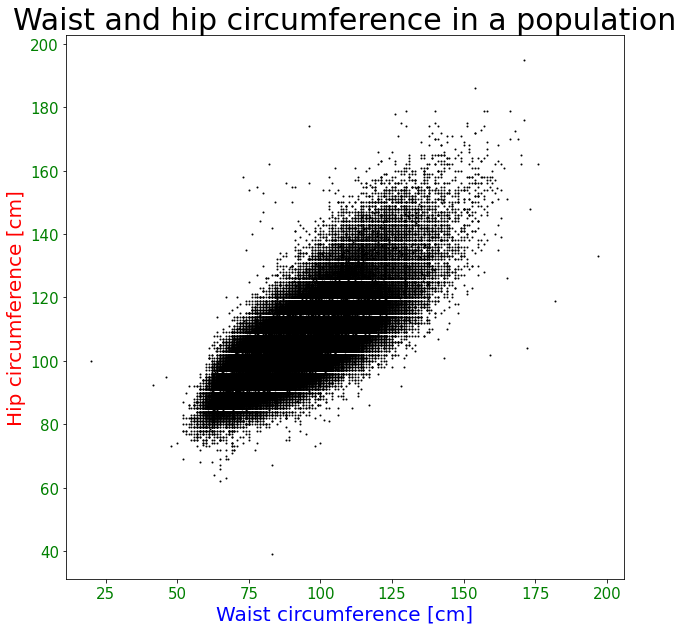

In [21]:
# change the color of markers
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1, c='k') # c changes the colors
plt.xlabel('Waist circumference [cm]',  fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]',  fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population',  fontsize = 30)
plt.xticks( c='g', fontsize = 15 )
plt.yticks( c='g', fontsize = 15 )

(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

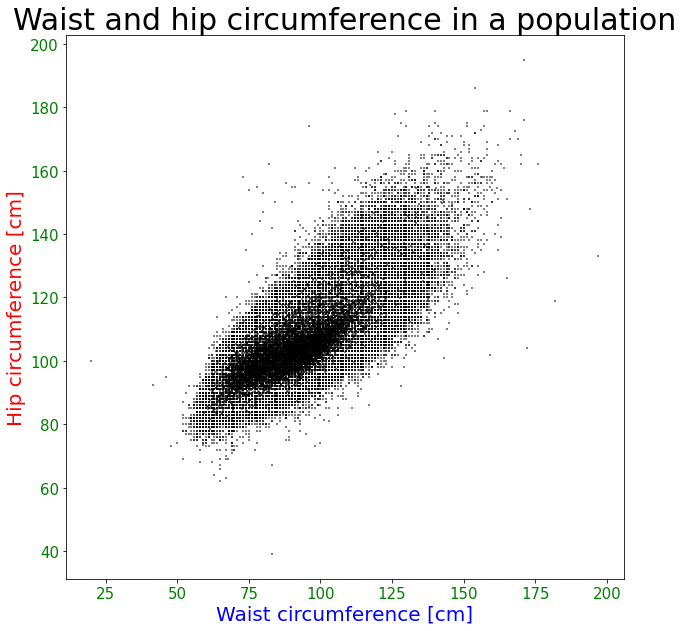

In [22]:
# change the marker density
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], 
            s=5, c='k', marker="+", alpha= 0.5) # c changes the colors
plt.xlabel('Waist circumference [cm]',  fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]',  fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population',  fontsize = 30)
plt.xticks( c='g', fontsize = 15 )
plt.yticks( c='g', fontsize = 15 )

### Multiple plots in one

(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

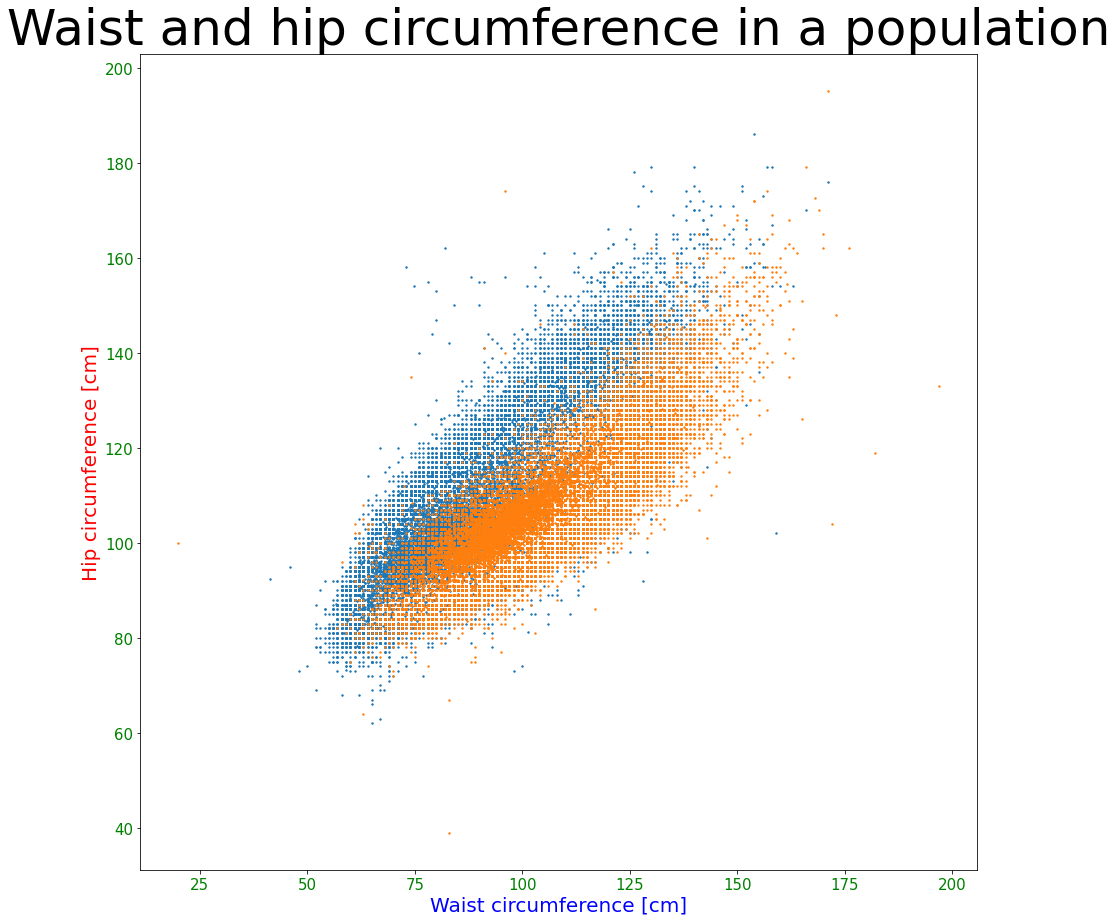

In [23]:
plt.figure(figsize = (15,15))
# plot for females
df1 = df[df['Gender'] == 0]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2)


# plot for males
df1 = df[df['Gender'] == 1]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2)


plt.xlabel('Waist circumference [cm]', fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population',  fontsize = 50)
plt.xticks( c='g', fontsize = 15 )
plt.yticks(c='g', fontsize = 15 )

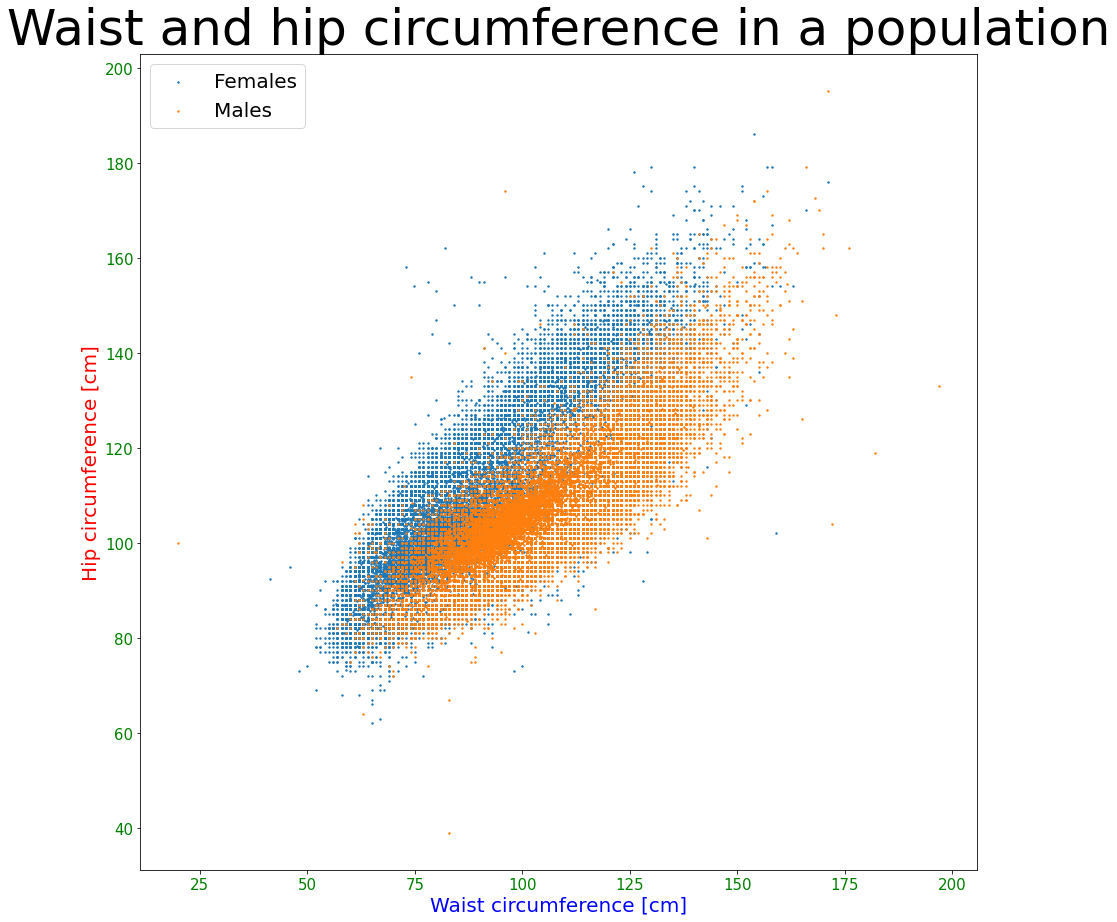

In [24]:
plt.figure(figsize = (15,15))
# plot for females
df1 = df[df['Gender'] == 0]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, label = 'Females') # add label

# plot for males
df1 = df[df['Gender'] == 1]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, label = 'Males')  # add label

plt.xlabel('Waist circumference [cm]',  fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]',  fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontsize = 50)
plt.xticks( c='g', fontsize = 15 )
plt.yticks( c='g', fontsize = 15 )
plt.legend(fontsize = 20) # add legend

0
1


(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

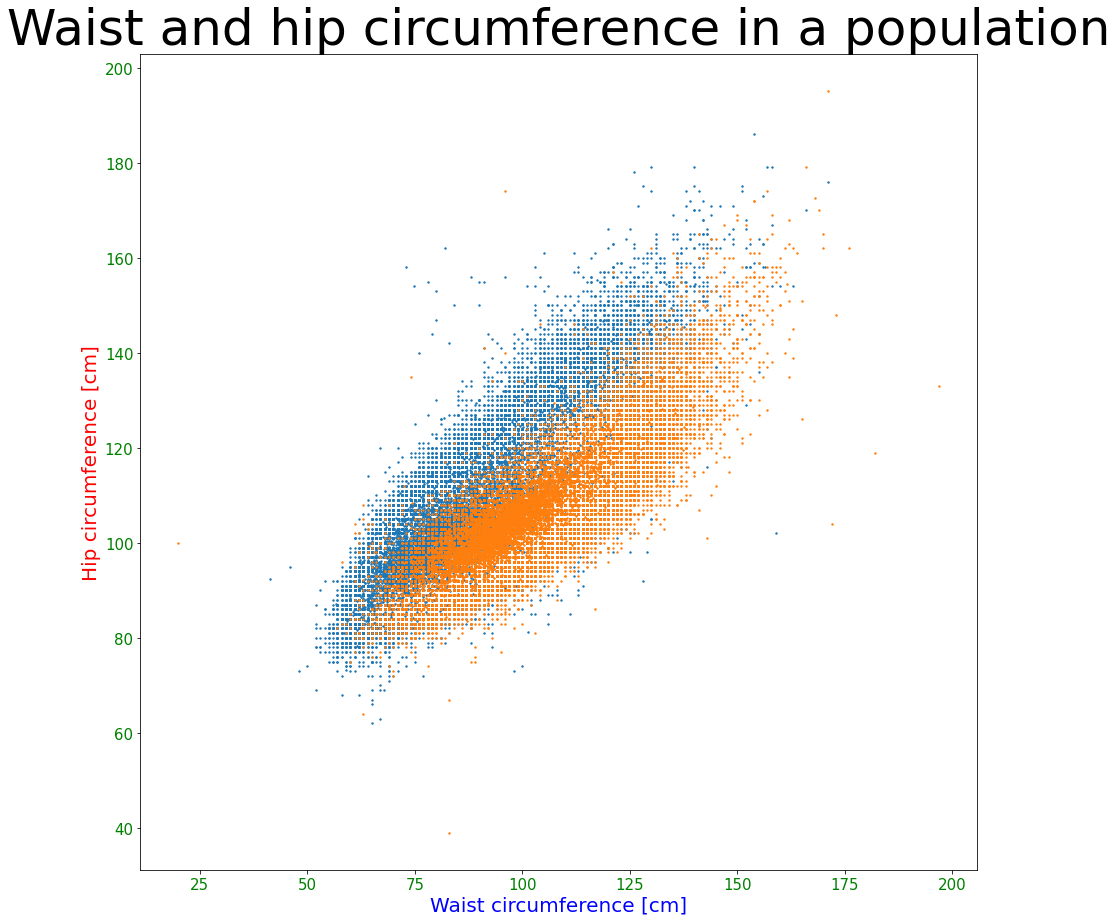

In [27]:
plt.figure(figsize = (15,15))

# run a loop to plot multiple scatters

for gender in range(0,2):
  print(gender)
  df1 = df[df['Gender'] == gender]
  plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2)

plt.xlabel('Waist circumference [cm]', fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]',  fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population',fontsize = 50)
plt.xticks( c='g', fontsize = 15 )
plt.yticks( c='g', fontsize = 15 )

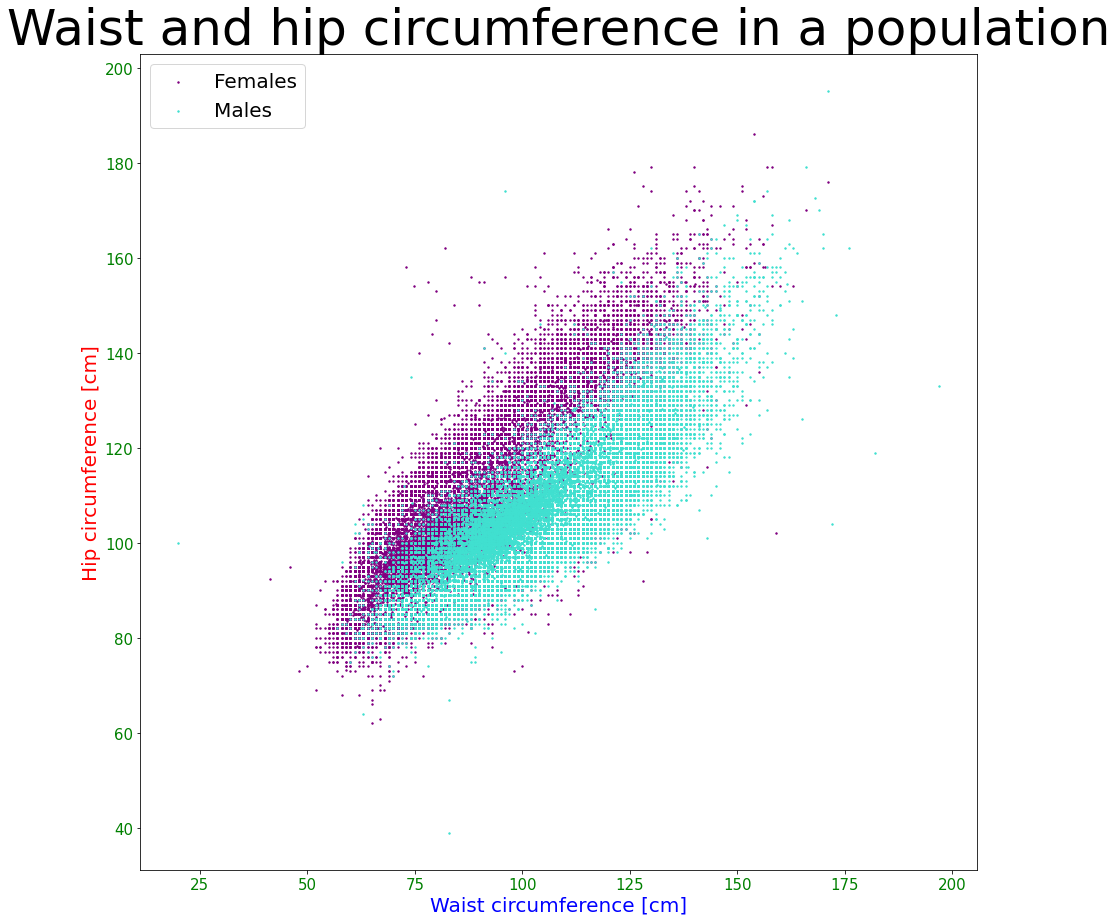

In [28]:
# make a dictionary to specify properties of each population

#nested dictionary
gender_dictionary = { 0: {"color":'purple', 'label': 'Females'},
                     1 : {"color":'turquoise', 'label': 'Males'}}

plt.figure(figsize = (15,15))

for gender in gender_dictionary:
  df1 = df[df['Gender'] == gender]
  
  plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, 
              c=gender_dictionary[gender]['color'], label = gender_dictionary[gender]['label'])

plt.xlabel('Waist circumference [cm]',  fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]',  fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population',  fontsize = 50)
plt.xticks( c='g', fontsize = 15 )
plt.yticks( c='g', fontsize = 15 )
plt.legend(fontsize = 20) 

(0.0, 3785.5)

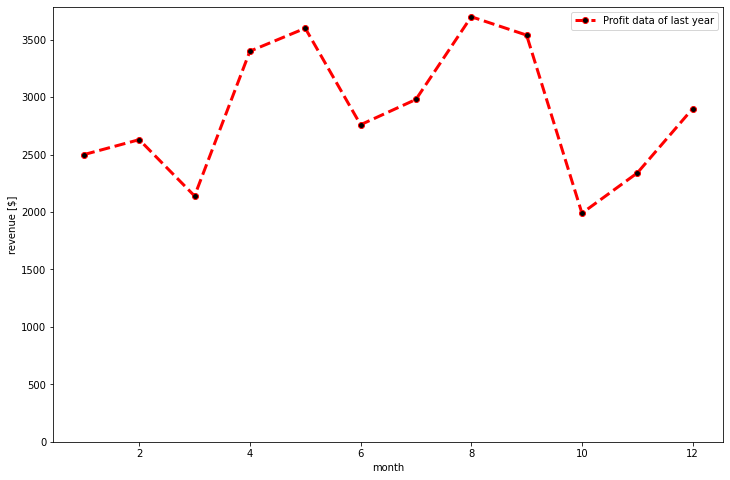

In [29]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'], label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k',  linestyle='--', linewidth=3)
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.legend()
plt.ylim(0,) # restrict the limit

(0.0, 3785.5)

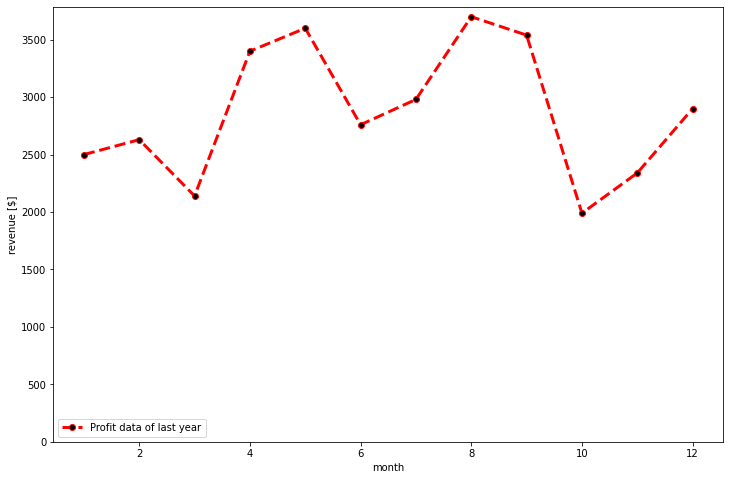

In [30]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'], label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k',  linestyle='--', linewidth=3)
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.legend(loc='lower left') #change the location of the label
plt.ylim(0,) 

# Save the figure

In [ ]:
# save the figure
gender_dictionary = { 0: {"color":'purple', 'label': 'Females'},
                     1 : {"color":'turquoise', 'label': 'Males'}}

plt.figure(figsize = (15,15))

for gender in gender_dictionary:
  df1 = df[df['Gender'] == gender]
  
  plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, 
              c=gender_dictionary[gender]['color'], label = gender_dictionary[gender]['label'])

# plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
# plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
# plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
# plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
# plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.legend(fontsize = 20) 

plt.savefig('some_ugly_figure.png', dpi = 300)
plt.savefig('some_ugly_figure.svg', dpi = 300)
plt.savefig('some_ugly_figure.pdf', dpi = 300)
plt.savefig('some_ugly_figure.eps', dpi = 300)



# Appendix

## Colors

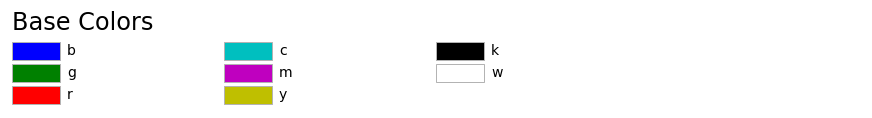

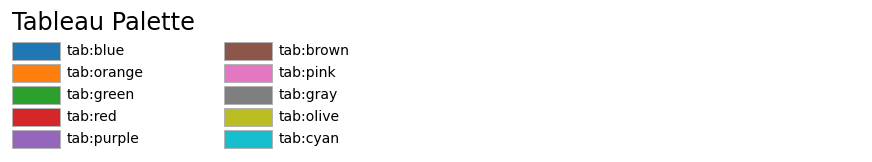


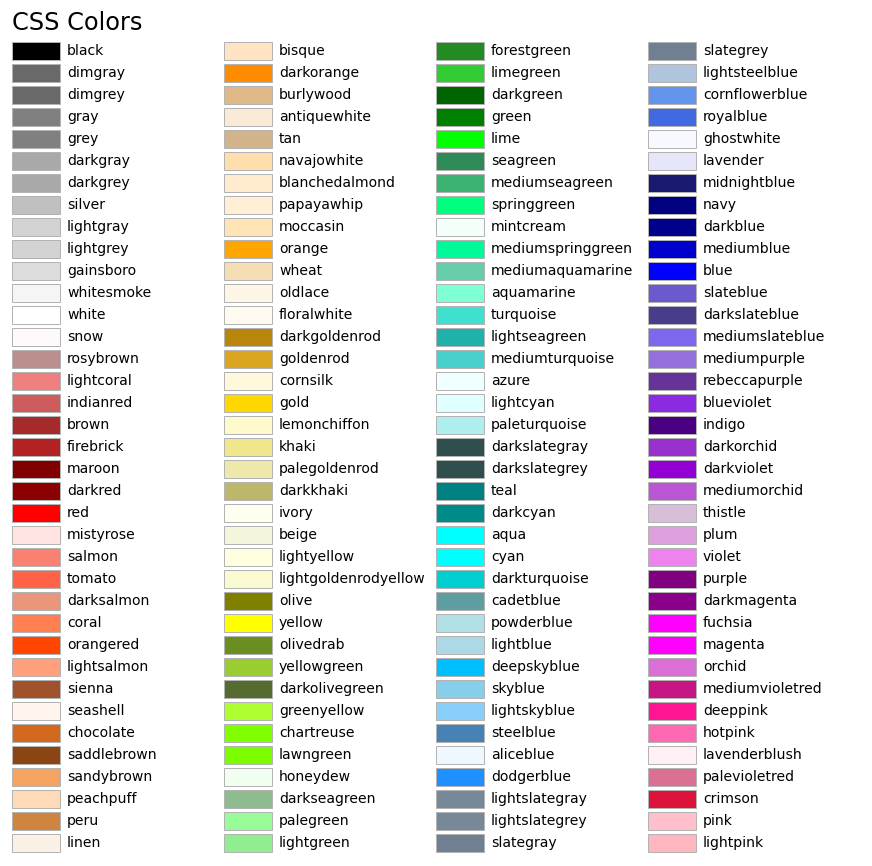

## Markers

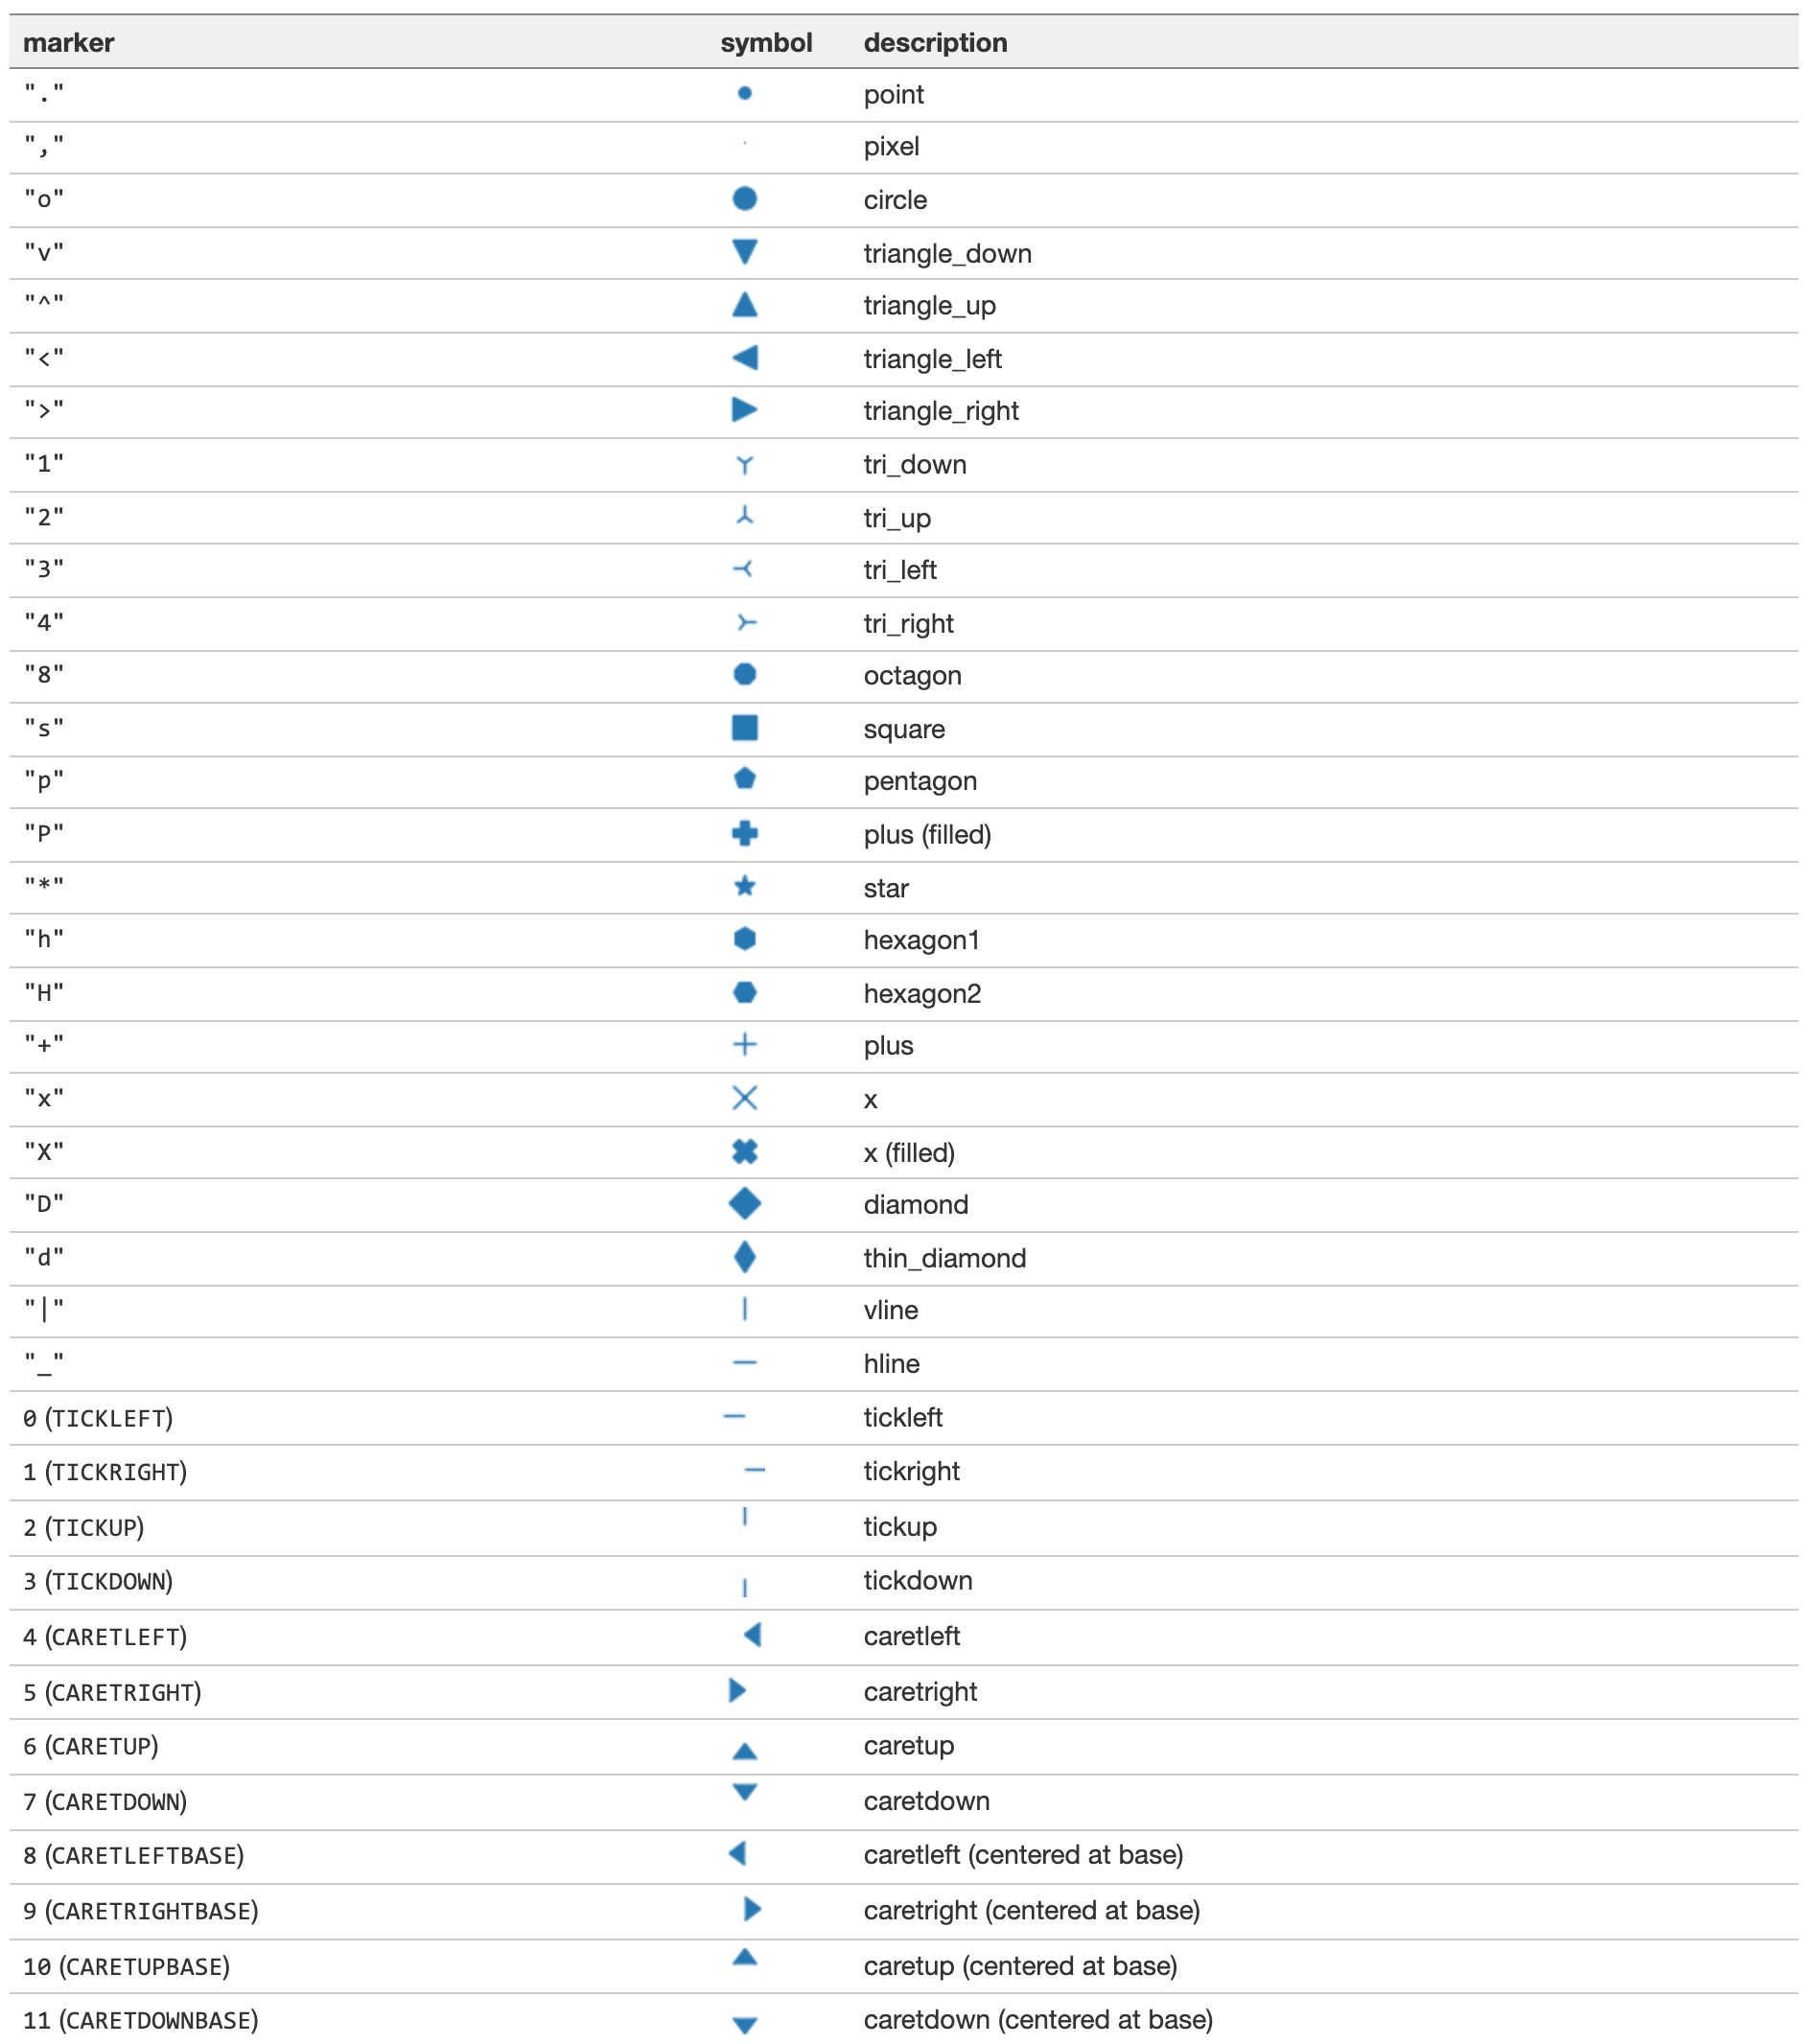

In [ ]:
#